In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Population.csv')

In [3]:
!pip install sheryanalysis==0.1.0

In [4]:
import sheryanalysis
sheryanalysis.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (115985, 19)
🧱 Columns: ['row_id', 'Relative Humidity (%)', 'Max Temp (°C)', 'Min Temp (°C)', 'Wind Speed (m/s)', 'Avg Temperature (°C)', 'Solar Radiation', 'Precipitation (mm)', 'Drought Index (SPEI)', 'Drought Status (0/1)', 'lat_sin', 'lat_cos', 'lon_sin', 'lon_cos', 'month_sin', 'month_cos', 'Drought Category', 'Drought Sort Order', 'Wind Speed (m/s) (bins)']

✅ No null values found

🔠 Categorical Columns: ['Drought Status (0/1)', 'lat_sin', 'lat_cos', 'lon_sin', 'lon_cos', 'month_sin', 'month_cos', 'Drought Category', 'Drought Sort Order', 'Wind Speed (m/s) (bins)']

🔢 Numerical Columns: ['row_id', 'Relative Humidity (%)', 'Max Temp (°C)', 'Min Temp (°C)', 'Wind Speed (m/s)', 'Avg Temperature (°C)', 'Solar Radiation', 'Precipitation (mm)', 'Drought Index (SPEI)']


{'shape': (115985, 19),
 'columns': ['row_id',
  'Relative Humidity (%)',
  'Max Temp (°C)',
  'Min Temp (°C)',
  'Wind Speed (m/s)',
  'Avg Temperature (°C)',
  'Solar Radiation',
  'Precipitation (mm)',
  'Drought Index (SPEI)',
  'Drought Status (0/1)',
  'lat_sin',
  'lat_cos',
  'lon_sin',
  'lon_cos',
  'month_sin',
  'month_cos',
  'Drought Category',
  'Drought Sort Order',
  'Wind Speed (m/s) (bins)'],
 'dtypes': {'row_id': dtype('int64'),
  'Relative Humidity (%)': dtype('float64'),
  'Max Temp (°C)': dtype('float64'),
  'Min Temp (°C)': dtype('float64'),
  'Wind Speed (m/s)': dtype('float64'),
  'Avg Temperature (°C)': dtype('float64'),
  'Solar Radiation': dtype('float64'),
  'Precipitation (mm)': dtype('float64'),
  'Drought Index (SPEI)': dtype('float64'),
  'Drought Status (0/1)': dtype('int64'),
  'lat_sin': dtype('float64'),
  'lat_cos': dtype('float64'),
  'lon_sin': dtype('float64'),
  'lon_cos': dtype('float64'),
  'month_sin': dtype('float64'),
  'month_cos': dtype

In [5]:
df.head()

,row_id,Relative Humidity (%),Max Temp (°C),Min Temp (°C),Wind Speed (m/s),Avg Temperature (°C),Solar Radiation,Precipitation (mm),Drought Index (SPEI),Drought Status (0/1),lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos,Drought Category,Drought Sort Order,Wind Speed (m/s) (bins)
0,14033,34.577802,28.602088,13.490549,2.542637,20.334396,19.807692,0.0,-0.749346,0,0.321439,0.946930,0.768842,0.639439,0.866025,0.5,Near Normal,4,2.5
1,14060,49.041648,19.430989,6.268022,2.735824,12.146264,15.994066,0.0,0.693145,0,0.442289,0.896873,0.362438,0.932008,0.866025,0.5,Near Normal,4,2.5
2,14067,29.329341,24.032198,7.509451,3.445495,14.776813,20.021868,0.0,-0.531620,0,0.329691,0.944089,0.370557,0.928810,0.866025,0.5,Near Normal,4,3.0
3,14113,37.730769,32.897802,15.828571,3.030879,23.376593,18.813297,0.0,-0.504290,0,0.177944,0.984041,-0.030539,0.999534,0.866025,0.5,Near Normal,4,3.0
4,14123,19.238462,31.121648,15.321758,3.733736,22.409451,18.602857,0.0,-0.293257,0,0.288196,0.957571,-0.237686,0.971342,0.866025,0.5,Near Normal,4,3.5


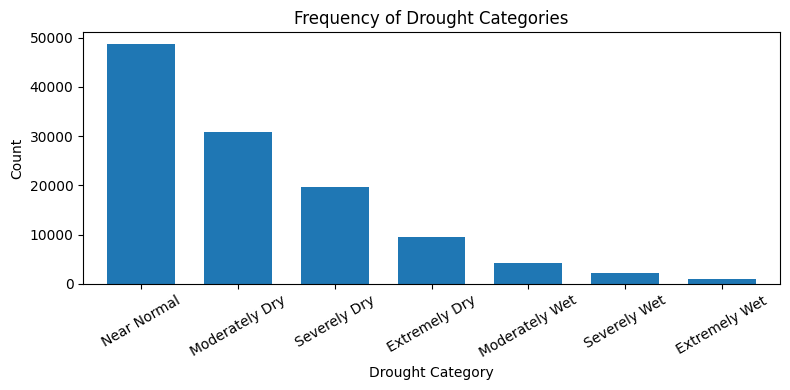

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Drought Category'].value_counts().plot(
    kind='bar',
    width=0.7
)

plt.title("Frequency of Drought Categories")
plt.xlabel("Drought Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
order = [
    "No Drought",
    "Mild",
    "Moderate",
    "Severe",
    "Extreme"
]

mapping = {v:i for i,v in enumerate(order)}

df['Drought_Category_encoded'] = df['Drought Category'].map(mapping)


In [11]:
# show current encoded values and why they might be NaN
print("Drought_Category_encoded (first 10):")
print(df['Drought_Category_encoded'].head(10))

print("\nCounts (including NaN):")
print(df['Drought_Category_encoded'].value_counts(dropna=False))

print("\nUnique Drought Category values:")
print(df['Drought Category'].unique())

# If all values are NaN, create a corrected encoding (saved to a new column)
if df['Drought_Category_encoded'].isna().all():
    mapping_fixed = {cat: i for i, cat in enumerate(sorted(df['Drought Category'].unique()))}
    df['Drought_Category_encoded_fixed'] = df['Drought Category'].map(mapping_fixed)
    print("\nApplied fixed mapping:")
    print(mapping_fixed)
    print("\nFixed encoded counts:")
    print(df['Drought_Category_encoded_fixed'].value_counts())

Drought_Category_encoded (first 10):
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Drought_Category_encoded, dtype: float64

Counts (including NaN):
Drought_Category_encoded
NaN    115985
Name: count, dtype: int64

Unique Drought Category values:
['Near Normal' 'Moderately Wet' 'Severely Wet' 'Moderately Dry'
 'Severely Dry' 'Extremely Dry' 'Extremely Wet']

Applied fixed mapping:
{'Extremely Dry': 0, 'Extremely Wet': 1, 'Moderately Dry': 2, 'Moderately Wet': 3, 'Near Normal': 4, 'Severely Dry': 5, 'Severely Wet': 6}

Fixed encoded counts:
Drought_Category_encoded_fixed
4    48647
2    30781
5    19654
0     9565
3     4199
6     2145
1      994
Name: count, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115985 entries, 0 to 115984
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          115985 non-null  int64  
 1   Relative Humidity (%)           115985 non-null  float64
 2   Max Temp (°C)                   115985 non-null  float64
 3   Min Temp (°C)                   115985 non-null  float64
 4   Wind Speed (m/s)                115985 non-null  float64
 5   Avg Temperature (°C)            115985 non-null  float64
 6   Solar Radiation                 115985 non-null  float64
 7   Precipitation (mm)              115985 non-null  float64
 8   Drought Index (SPEI)            115985 non-null  float64
 9   Drought Status (0/1)            115985 non-null  int64  
 10  lat_sin                         115985 non-null  float64
 11  lat_cos                         115985 non-null  float64
 12  lon_sin         

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Use the existing dataframe and the fixed numeric encoding as the target
X = df.drop(['Drought Category', 'Drought_Category_encoded_fixed', 'Drought_Category_encoded', 'row_id'], axis=1)
y = df['Drought_Category_encoded_fixed']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    # use weighted average for multiclass F1
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [21]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'Naive Bayes', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'Decision Tree', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'SVM', 'Accuracy': 0.9999, 'F1 Score': 0.9999},
 {'Model': 'KNN', 'Accuracy': 0.9841, 'F1 Score': 0.9839},
 {'Model': 'Logistic Regression', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'Naive Bayes', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'Decision Tree', 'Accuracy': 1.0, 'F1 Score': 1.0},
 {'Model': 'SVM', 'Accuracy': 0.9999, 'F1 Score': 0.9999},
 {'Model': 'KNN', 'Accuracy': 0.9841, 'F1 Score': 0.9839}]

In [22]:
import joblib
joblib.dump(models['SVM'],'SVM_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']